# Tutorial for $\textit{RadliteModel}$


**Welcome!**

This tutorial walks through the basic functionalities of the $\textit{RadliteModel}$ class.  With this class, we can ultimately use the ray-tracing code RADLite to calculate molecular lines within our specified range of criteria.

Here are all of the topics that we'll cover:

- Setup
- Getting started
- Initializing the $\textit{RadliteModel}$ class
- Inspecting the RADLite setup
    - Fetching attributes (and units)
    - Plotting attributes
- Running RADLite


***Preceding tutorial: N/A.***
***Next tutorial: "tutorial_RadliteSpectrum.ipynb".***

## Setup

Before you can run this tutorial, you'll need to complete two essential, non-Python setup tasks:

1. Install RADLite (i.e., run the install file within the RADLITE folder).
2. Download HITRAN data files from the HITRAN website (https://hitran.org/).  We recommend putting them in a folder called "HITRAN" within the same directory as the "DOCS" and "RADLITE" folders.

## Getting started

To make this tutorial a bit more robust to different installation styles (e.g., if you've directly downloaded the code from Github), we'll first directly add the path to the package to system path file using the Python $\textit{sys}$ package:

In [1]:
#Add path to Python-RADLite package to system
import sys
sys.path.append("../../pyradlite/pyradlite/")

And now we import the Python-RADLite module from within $\textit{pyradlite}$:

In [2]:
#Import Python-RADLite package
import radlite as RDL

We'll refer to the Python-RADLite module as $\textit{RDL}$ from here on out.

## Initializing the $\textit{RadliteModel}$ class

Next, we define the paths+filenames to the input .json files that $\textit{RadliteModel}$ needs to run:

The first one, which we have named "input_radlite.json", contains all of the parameters necessary to run RADLite. You must go into this file and update exe_path to point to the RADLite executable. You're welcome to go in and play around with other parameters, but **please don't remove any of the inputs!!!**  The code needs those values to run.

The second, which we have named "data_hitran.json", contains information (molecular weights, names of the HITRAN files, etc.) that are necessary for accessing molecules provided in the HITRAN file with this code.  You don't really need to change this file, unless you wanted to add more molecules than what we have already included.  Note that any molecules you add *must be contained in the HITRAN database*.

In [7]:
#Path+name strings to the .json input files
infilename = "files_for_tutorials/input_radlite.json" #Input file with RADLite parameters
hitranfilename = "files_for_tutorials/data_hitran.json" #Input file with HITRAN parameters

Finally, we define the path to the folder containing all of the RADMC output files.

In [8]:
#Path to the RADMC output files
radmcfilepath = "files_for_tutorials/radmc_outputs/"

Now let's initialize an instance of the $\textit{RadliteModel}$ class.  By default we have set $\textit{verbose=True}$ in the input file "input_radlite.json", so when you run the next cell you should get lots of appropriately-verbose messages telling you what's happening behind-the-scenes:

In [9]:
#Initialize an instance of the RadliteModel() class
myMod = RDL.RadliteModel(infilename=infilename, hitranfilename=hitranfilename,
                         radmcfilepath=radmcfilepath)

--------------------------------------------------
Welcome to RADLite Version 1.3.0!

RADLite Version 1.2 (in IDL) was written by:
Klaus Pontoppidan (pontoppi@stsci.edu)
Kees Dullemond
Alex Lockwood
Rowin Meijerink

RADLite Version 1.3.0 (in Python) was written by:
Jamila Pegues (jamila.pegues@cfa.harvard.edu)
Klaus Pontoppidan (pontoppi@stsci.edu)
--------------------------------------------------



----------
Now preparing all RADLite input files...

Will prepare a spectrum-formatted image cube...

Writing RADLite input files...

Calculating abundance...
Setting a constant abundance...
Done calculating abundance!

Calculating gas density from dust density...
Done calculating gas density!

Calculating gas temperature...
Assuming gas temperature = dust temperature...
Done calculating gas temperature!

Calculating turbulence...
Using first dust component temperature to determine turbulent velocities...
Done calculating turbulence!

Extracting stellar info from file files_for_tutorials/

If all went well, you should see a message towards the bottom of the verbose output telling you that the RADLite preparation is complete.

## Inspecting the RADLite setup

Before we actually run RADLite, we can take some time to inspect the RADLite setup.

### Fetching attributes (and units)

We can access user-specified inputs, as well as physical components of the model that $\textit{RadliteModel}$ calculated during initialization, using the $\textit{get_attr}$ method.  We only have to pass in the string name of the attribute.  Here are some examples:

In [13]:
#Print the number of cores assigned to this model
print(myMod.get_attr("numcores"))

#Record and print the first 10 theta points
thetas = myMod.get_attr("theta")
print(thetas[0:10])

#Print the gastodust ratio
print(myMod.get_attr("gastodust"))

#Print the name of the molecule for which RADLite will calculate fluxes
print(myMod.get_attr("molname"))

#Make sure you have correct path to the RADlite executable
myMod.get_attr("exe_path")

3
[0.1570797  0.28045136 0.40382303 0.5271947  0.65056636 0.77393803
 0.8973097  1.0206814  1.144053   1.2674247 ]
12800.0
12CO


If we are ever unsure of the exact name of a quantity, then we can pass in the string "help", and the code will throw a helpful error returning all attributes that we can access through this method:

In [20]:
#Uncomment the code below to produce the error

#myMod.get_attr("exe_help")

'/Users/jpegues/Documents/github_radlite/radlite/RADLITE/'

We can also get the automatic units (in Latex notation) for any of the quantities calculated during initialization using the $\textit{get_unit}$ method.  Most quantities are in cgs units.  Here are some examples:

In [11]:
#Print the unit for the phi-component of the velocity
print(myMod.get_unit("velocity_phi"))

#Print the unit for the radius points
print(myMod.get_unit("radius"))

cm s$^{-1}$
cm


Note that $\textit{get_unit}$ doesn't give the correct units for user-specified inputs that we passed in during initialization - we'll only get back an empty string.  But we can always refer back to the input file itself if we want to see the units assumed for those input quantities.

### Plotting attributes

The method $\textit{plot_attr}$ is a ***simple*** method (heavy emphasis on the word ***simple***) that is meant to do quick sensible inspections of the setup.  Beneath the hood, it uses the Python matplotlib package, and is only meant to be a shortcut towards plotting the physical components of the model.

Depending on the dimensions (1D or 2D) of the physical component, $\textit{plot_attr}$ will plot either a line+scatter plot or a gradient.  For example, we can plot the 1D radius and 1D theta points like so:

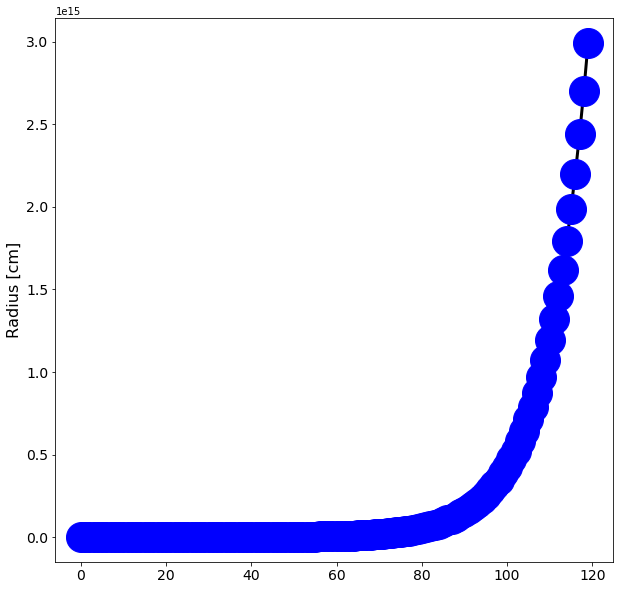

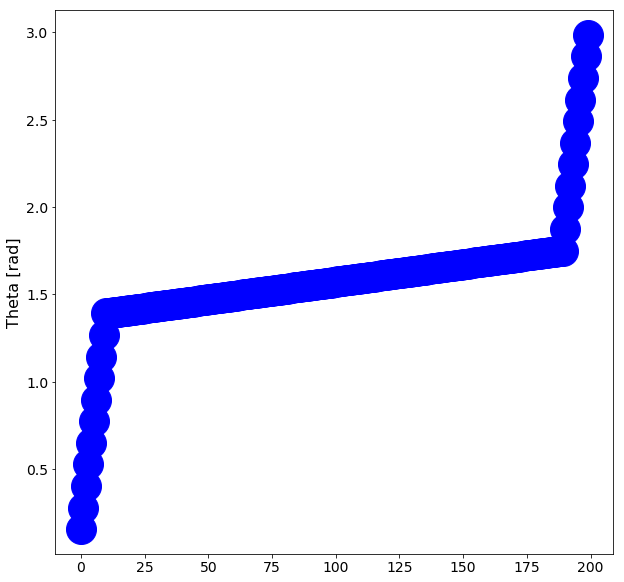

In [10]:
#Plot the sampled radius and theta points
myMod.plot_attr("radius") #For radius points
myMod.plot_attr("theta") #For theta points

The code automatically plotted the given attribute along a number line.  Notice that the code also automatically populated the y-axis labels+units for us.

Before we move onto the 2D case, we can make the 1D plot a little fancier.  This method accepts several of the parameters used commonly by the matplotlib package.  For example, let's do the following for a plot of the radial points:
- Change the figure size
- Change the x-axis scale to log
- Change the units of the y-axis by scaling the values
- Override the y-axis label unit
- Change the size/colors of the markers and line
- Put in a title

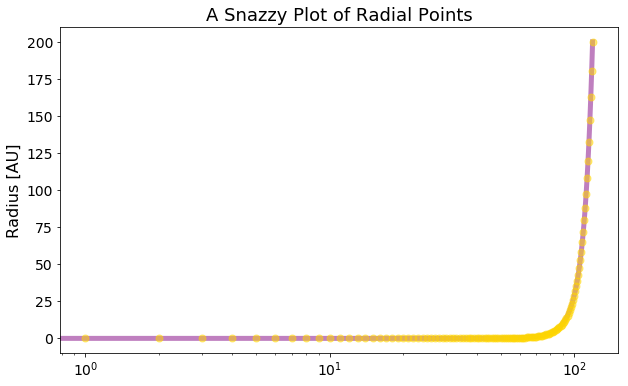

In [11]:
#Set some parameters to pass into the plot_attr method
figsize = (10, 6) #Figure size
xlog = True #Put the x-axis on a log-scale
yscaler = 6.6846E-14 #Multiplicative factor that will scale the y-axis from cm to AU
yunit = "AU" #Override the y-axis label unit
#
markercolor = "gold" #Change the marker color
markersize = 7 #Change the marker size
linecolor = "purple" #Change the line color
linewidth = 5 #Change the line thickness
alpha = 0.5 #Make everything a bit more translucent
#
title = "A Snazzy Plot of Radial Points" #Set the title of the figure

#Plot the sampled radius points in a fancier manner
myMod.plot_attr("radius", figsize=figsize, xlog=xlog, yscaler=yscaler, yunit=yunit,
                markercolor=markercolor, markersize=markersize, linecolor=linecolor,
                linewidth=linewidth, alpha=alpha, title=title)

Now let's move on to the 2D case. We can plot the phi component of the 2D velocity like so:

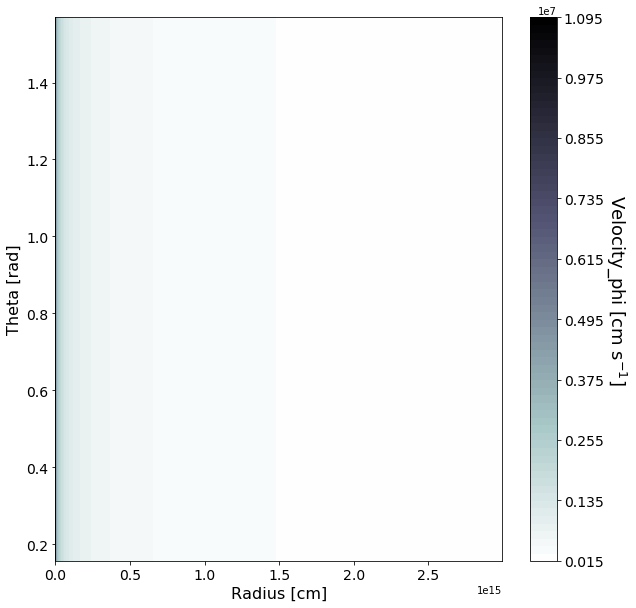

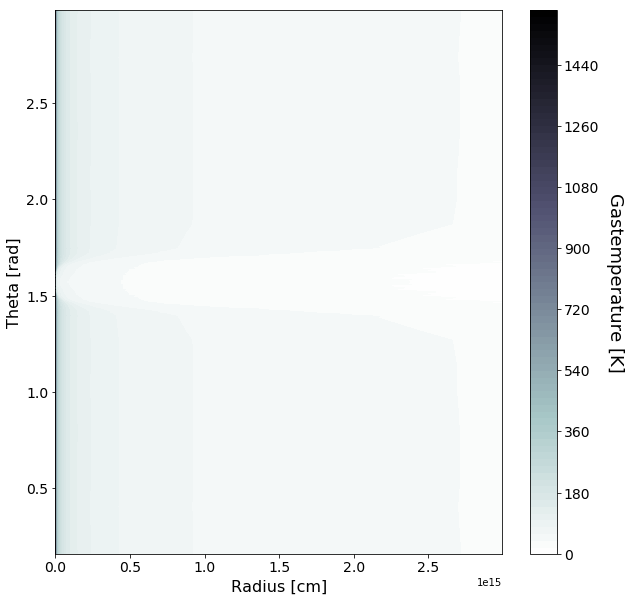

In [12]:
#Plot the gas temperature and a velocity component
myMod.plot_attr("velocity_phi") #For the phi component of the velocity
myMod.plot_attr("gastemperature") #For the gas temperature

This time, the code automatically plotted the given attribute against radius and theta, and automatically populated the axis labels+units for us.

Let's make the 2D plot a little fancier as well.  This time, let's do the following for the gas temperature plot:
- Change the figure size
- Change the x-axis scale to log
- Change the units of all axes by scaling the values
- Override all axis label units
- Increase various font sizes
- Change the colormap and its contour levels
- Put in a title

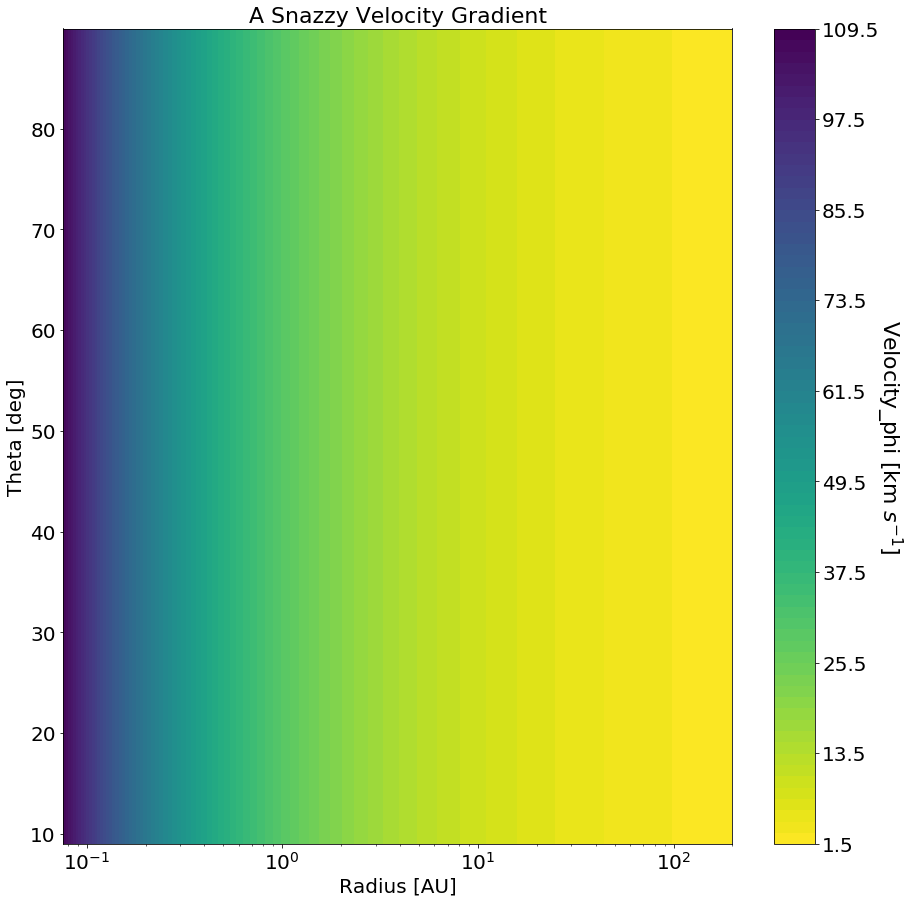

In [13]:
#Set some parameters to pass into the plot_attr method

#Overall figure/title changes
figsize = (15, 15) #Figure size
xlog = True #Put the x-axis on a log-scale
title = "A Snazzy Velocity Gradient" #Set the title of the figure

#Scale and unit changes
xscaler = 6.6846E-14 #Multiplicative factor; will scale the x-axis from cm to AU
xunit = "AU" #Override the x-axis label unit
yscaler = 180.0/3.14159 #Multiplicative factor; will scale the y-axis from radians to degrees
yunit = "deg" #Override the y-axis label unit
zscaler = 1E-5 #Multiplicative factor; will scale the z-axis from cm/s to km/s
zunit = r"km $s^{-1}$" #Override the z-axis label unit (Latex notation)

#Colormap changes
import matplotlib.pyplot as plt #We need to import this to fetch a different colorbar
cmap = plt.cm.viridis_r #Change the colormap
levels = 100 #Number of contour levels to use for the gradient
#Uncomment the line below to manually set the levels, rather than the number of levels
#levels = [10, 20, 40, 80, 160, 320, 640] #The contour levels to use for the gradient

#Font and title changes
axisfontsize = 20 #Axis fontsize
titlefontsize = 22 #Title fontsize
tickfontsize = 20 #Tick label fontsize

#Plot the phi component of the velocity in a fancier manner
myMod.plot_attr("velocity_phi", figsize=figsize, xlog=xlog, xscaler=xscaler, xunit=xunit,
                yscaler=yscaler, yunit=yunit, zscaler=zscaler, zunit=zunit, levels=levels,
                cmap=cmap, title=title, axisfontsize=axisfontsize,
                titlefontsize=titlefontsize, tickfontsize=tickfontsize)

### **Note that we can always get a full list of the parameters for this method (** ***and any other method in this class*** **) by printing the method's docstring:**

In [14]:
#Print the docstring for this method
print(myMod.plot_attr.__doc__)


        Method: plot_attr
        Purpose:
            > Plots the given attribute(s).
        Inputs: 1 required, 24 optional
            > yattrname (required)
                - Type: string
                - Example: "velocity_phi"
                - Description: Name of the attribute (such as "velocity_phi" for
                  ...the phi component of the velocity) to either plot as a
                  ...gradient (if 2D) or plot as the y-axis of a line+scatter
                  ...plot (if 1D).
                - Type: integer OR float; in [0,1]
                - Example: 0.5
                - Description: Measure of transparency of the line+scatter plot.
                  ...1 is fully opaque and 0 is fully transparent.
            > axisfontsize (optional; default=16)
                - Type: integer OR float
                - Example: 10
                - Description: The fontsize for the x-axis and y-axis labels and
                  ...for the colorbar label (if yattrname attr

Finally, we can save this plot by setting $\textit{dosave=True}$ and passing in a name to save the plot under:

In [15]:
#Set a string name to save the plot
savename = "fancyplot.png"

#Save the fancy plot of the phi component of the velocity
myMod.plot_attr("velocity_phi", figsize=figsize, xlog=xlog, xscaler=xscaler, xunit=xunit,
                yscaler=yscaler, yunit=yunit, zscaler=zscaler, zunit=zunit, levels=levels,
                cmap=cmap, title=title, axisfontsize=axisfontsize,
                titlefontsize=titlefontsize, tickfontsize=tickfontsize,
               dosave=True, savename=savename)

We can also chain and overlap plots.  We'll talk about that technique in the multiruns tutorial (called "tutorial_multiruns.ipynb"), as it's a much more useful technique when plotting spectra across different RADLite runs.

## Running RADLite

Now that we have inspected the input, we can go ahead and run RADLite!  We do so by calling the $\textit{run_radlite}$ method.

***Fair warning: this method can take a while!!!***  RADLite calculates each molecular line individually, so the more molecular lines you have in the range of criteria you specified in the input file (minimum-maximum wavelength range, minimum-maximum abundances, maximum upper energy level, etc.), the longer the code will take to process them all.  Increasing the number of cores will decrease the overall run time, but at the end of the day you're limited by your own computing power.

The default parameters given in the input file as a part of this tutorial will cause this next block of code to take about a ~minute.

In [12]:
#Run RADLite
myMod.run_radlite()

Attempting to create run directory rundir...
rundir already exists. Will overwrite files within.
All input files and final data will be saved to the following folder in the current directory: rundir
Running RADLite on 3 core(s)...
Generating working directory for cores called: ./rundir/workingdir
All core outputs will be stored in: ./rundir/outputdir
Replacing previous ./rundir/outputdir...
Prepping 0th core...
Starting 0th core in ./rundir/workingdir/workingdir_cpu0/...
0th core has started working...
Prepping 1th core...
Starting 1th core in ./rundir/workingdir/workingdir_cpu1/...
1th core has started working...
Prepping 2th core...
Starting 2th core in ./rundir/workingdir/workingdir_cpu2/...
Done starting core(s)!
2th core has started working...
(Function _write_core_levelpopinp took 1.03e+00s.)
(Function _write_core_levelpopinp took 1.04e+00s.)
(Function _write_core_levelpopinp took 1.26e+00s.)
2th core has finished working!
(Function _run_core took 2.25e+02s.)
0th core has finishe

Once $\textit{run_radlite}$ has finished, and if $\textit{verbose=True}$ in the input RADLite file, then we get a verbal message saying "Done running run_radlite()!".

Now we can check our local directory.  Within the folder we specified in the input RADLite file (default is "rundir"), we now see a folder called "outputdir" containing all of the files output by RADLite.  We can process these files using the $\textit{RadliteSpectrum}$ class, which we talk about in **the next tutorial: "tutorial_RadliteSpectrum.ipynb"**.